- Name of activity (Homework 3: Python and Web Scraper)
- Your name: Dima Mikhaylov
- Your UVA computing IDs: agp7dp@virginia.edu

TODO:

- Write a simple web crawler / web scraper. [Focus of the assignment.]
    - Choose your own website(s).
    - Choose what information (hyperlinks and/or other data) you wish to extract from the website(s).

Note, not all websites can be scraped due to security settings.

In [78]:
# Website to scrape
path = "https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/"

In [79]:
# Import library to connect to a web resourse without browser
import requests 

# Import library to manipulate html tags
from bs4 import BeautifulSoup 

In [80]:
# Get the web page(s), html expected
page = requests.get(path).text 

# Parse html into tags object
soup = BeautifulSoup(page, "html.parser")

In [81]:
# Pick up the content of the table
match = soup.find(attrs={"dataTables-content-main"})

In [83]:
# Prepare a placeholder for output
data = []

# Get all rows of the table
rows = match.find_all('tr')

# Loop through the rows ...
for row in rows:
    # and get all the columns
    cols = row.find_all('td')

    # get the content of every cell
    cols = [ele.text.strip() for ele in cols]

    # append to output and get rid of empty values, if any
    data.append([ele for ele in cols if ele])

In [85]:
# Import pandas library 
import pandas as pd

# Create a dataframe by providing records (as list of litsts) and column names
df = pd.DataFrame(data, columns=['bank', 'city', 'state', 'cert', 'AI', 'date', 'fund'])

In [86]:
# Inspect the resulting dataframe
df.tail()

,bank,city,state,cert,AI,date,fund
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646
562,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,"October 13, 2000",4645


In [87]:
# Note: from literature review:563 records expected 
len(df)

563

In [88]:
# Check the data types, objects expected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bank    563 non-null    object
 1   city    563 non-null    object
 2   state   563 non-null    object
 3   cert    563 non-null    object
 4   AI      563 non-null    object
 5   date    563 non-null    object
 6   fund    563 non-null    object
dtypes: object(7)
memory usage: 30.9+ KB


TODO:

- Store the obtained information in a CSV file (or other as appropriate).
- Read the data from the CSV file into the program for analysis.

In [8]:
# Store the dataframe in csv file
df.to_csv("dataTables-content-main.csv")

In [89]:
# Read the csv file and inspect the data
analysis_set = pd.read_csv("dataTables-content-main.csv", index_col=0)
analysis_set.head()

,bank,city,state,cert,AI,date,fund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534


TODO:
- Turn “data” into (“information” and then) “knowledge.” Analyze the data and provide some interesting statistics/results. (This can be quite simple.)  From the analysis, be able to tell a story about the data; describe any trends/patterns found in the data; if applicable, describe any interesting or unusual results (e.g., outliers) and try to come up with an explanation for these anomalies.

In [52]:
# First, convert date to datetime type
analysis_set.date = pd.to_datetime(analysis_set['date'])

In [53]:
# Move datetype year into a separate column
analysis_set['year'] = analysis_set['date'].dt.year

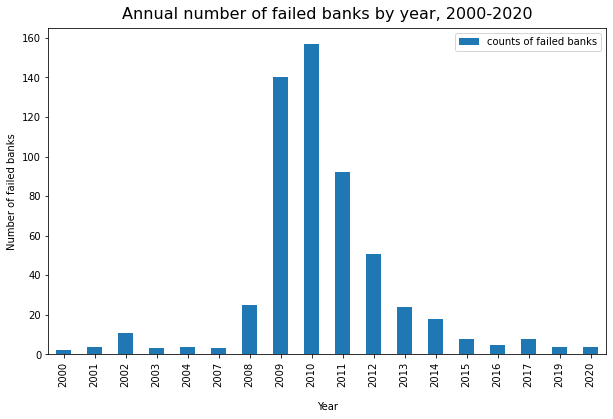

In [77]:
# Import matplotlib pyplot for better visuals
import matplotlib.pyplot as plt

# Group observation (failed banks) by year and produce bar plot
analysis_set['bank'].groupby(analysis_set.year).count().plot(
    kind='bar', figsize=(10, 6), label="counts of failed banks")

# Plot appearance management
plt.title("Annual number of failed banks by year, 2000-2020", y=1.01, fontsize=16)
plt.ylabel("Number of failed banks", labelpad=15)
plt.xlabel("Year", labelpad=15)
plt.legend()
plt.show()

TODO:
- If you have time or want to be challenged further, add extra functionality to the program or manipulate the data further in some way to produce additional useful/interesting results. Be sure to include a section in your write-up (see below) to explain what you did and what additional results you obtained (if appropriate).

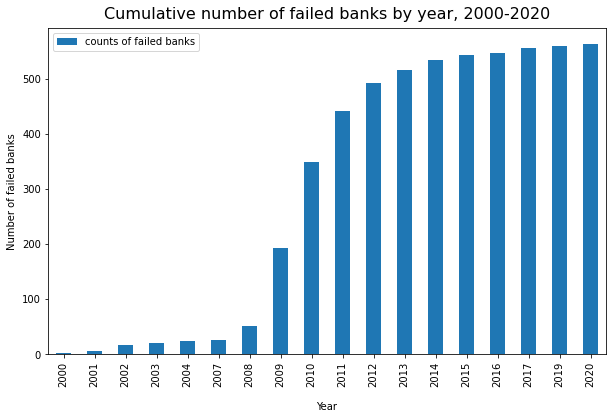

In [66]:
# Same as above, but now calculatate cumulative sum of annual counts of failed banks
analysis_set.groupby(analysis_set['year'])['bank'].count().cumsum(axis=0).plot(
    kind='bar', figsize=(10, 6), label="counts of failed banks")

# Plot appearance management
plt.title("Cumulative number of failed banks by year, 2000-2020", y=1.01, fontsize=16)
plt.ylabel("Number of failed banks", labelpad=5)
plt.xlabel("Year", labelpad=15)
plt.legend()
plt.show()

A short report (maximum three pages) detailing:
- an overview of what you accomplished (introduction)
your approach to this assignment
- what kind of data you decided to crawl/scrape (domain, etc.)
the algorithm of your Python code and what libraries, etc., you used (focus on which library/libraries you used, and remember to cite sources!) 
- reasons why someone might want to use your program (utility of the data you scraped - this can be simple/straightforward) 
- (optional) ways your program could be extended to include additional features
- (optional) any extra functionality you added to the program beyond the given requirements, as well as any additional results you obtained as a result of it (if appropriate). Call this section “Extra Credit.”